svid      int64
azim    float64
elev    float64
s4       object
dtype: object
                      azim  elev      y
time_utc                               
2018-09-04 14:10:00  280.0  14.0  0.220
2018-09-04 14:11:00  280.0  14.0  0.187
2018-09-04 14:12:00  280.0  14.0  0.193
2018-09-04 14:13:00  280.0  14.0  0.186
2018-09-04 14:14:00  280.0  14.0  0.168
...                    ...   ...    ...
2018-09-15 23:55:00  280.0  14.0  0.165
2018-09-15 23:56:00  280.0  14.0  0.157
2018-09-15 23:57:00  280.0  14.0  0.153
2018-09-15 23:58:00  280.0  14.0  0.154
2018-09-15 23:59:00  280.0  14.0  0.154

[16430 rows x 3 columns]
                      azim  elev      y
time_utc                               
2018-09-10 16:23:00  280.0  14.0  0.491


,azim,elev,y
time_utc,,,
2018-09-04 14:10:00,280.0,14.0,0.220
2018-09-04 14:11:00,280.0,14.0,0.187
2018-09-04 14:12:00,280.0,14.0,0.193
2018-09-04 14:13:00,280.0,14.0,0.186
2018-09-04 14:14:00,280.0,14.0,0.168
...,...,...,...
2018-09-15 23:55:00,280.0,14.0,0.165
2018-09-15 23:56:00,280.0,14.0,0.157
2018-09-15 23:57:00,280.0,14.0,0.153


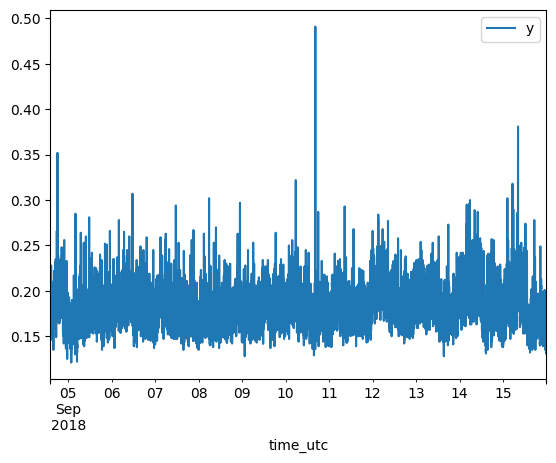

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''], index_col = 'time_utc', parse_dates=True)

# data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data[data.index >= '2018-09-04 14:10:00']
# data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
# data = data.loc[data['time_utc']<='2018-09-13 13:54:00']
# values = data[' svid'].value_counts()[:4].index.tolist()
# values = data[' svid'].value_counts()[:6]
# print(values)
# data = data[data[' svid'].isin(values)]
print(data.dtypes)
data = data[data[' svid'] == 131]
data = data[[' azim', ' elev', ' s4']]
data.columns = ['azim', 'elev', 'y']
data['y'] = data['y'].astype(float)
print(data)
# data.dropna(inplace=True)
# data.reset_index(drop=True, inplace=True)
# data = data[:1000]
# print(data)
# data = data[:50]

# train = data.loc[data['ds']<'2018-09-14 23:59:00']
# test = data.loc[data['ds']>='2018-09-14 23:59:00']
data.plot(y='y')
data.to_csv('/home/lemateus/TCC/cintilacao/only_131.csv')
data.interpolate('linear')
print(data[data['y'] == data['y'].max()])
data
# train

In [96]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]
X

,azim,elev
time_utc,,
2018-09-04 14:10:00,280.0,14.0
2018-09-04 14:11:00,280.0,14.0
2018-09-04 14:12:00,280.0,14.0
2018-09-04 14:13:00,280.0,14.0
2018-09-04 14:14:00,280.0,14.0
...,...,...
2018-09-15 23:55:00,280.0,14.0
2018-09-15 23:56:00,280.0,14.0
2018-09-15 23:57:00,280.0,14.0


In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
print(X.dtypes)
ss = StandardScaler()
X_ss = ss.fit_transform(X)
Y_mm = mm.fit(Y)
Y_mm = mm.transform(Y)
# Y_mm = Y
# X_ss = X

azim    float64
elev    float64
dtype: object


In [103]:
X_train = X_ss[:-1440, :]
X_test = X_ss[-1440:, :]

y_train = Y_mm[:-1440, :]
y_test = Y_mm[-1440:, :]

print('Training shape: ', X_train.shape, y_train.shape)
print('Testing shape: ', X_test.shape, y_test.shape)
print(X_train)

Training shape:  (14990, 2) (14990, 1)
Testing shape:  (1440, 2) (1440, 1)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [104]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [105]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([14990, 1, 2]) torch.Size([14990, 1])
Testing Shape torch.Size([1440, 1, 2]) torch.Size([1440, 1])


In [107]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out


In [110]:

num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 2 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 
lstm1

LSTM1(
  (lstm): LSTM(2, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [109]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.00574
Epoch: 100, loss: 0.00342
Epoch: 200, loss: 0.00342
Epoch: 300, loss: 0.00342
Epoch: 400, loss: 0.00342
Epoch: 500, loss: 0.00342
Epoch: 600, loss: 0.00342
Epoch: 700, loss: 0.00342
Epoch: 800, loss: 0.00342
Epoch: 900, loss: 0.00342


In [ ]:
df_X_ss = ss.transform(data.iloc[:, :-1]) #old transformers
df_y_mm = mm.transform(data.iloc[:, -1:]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

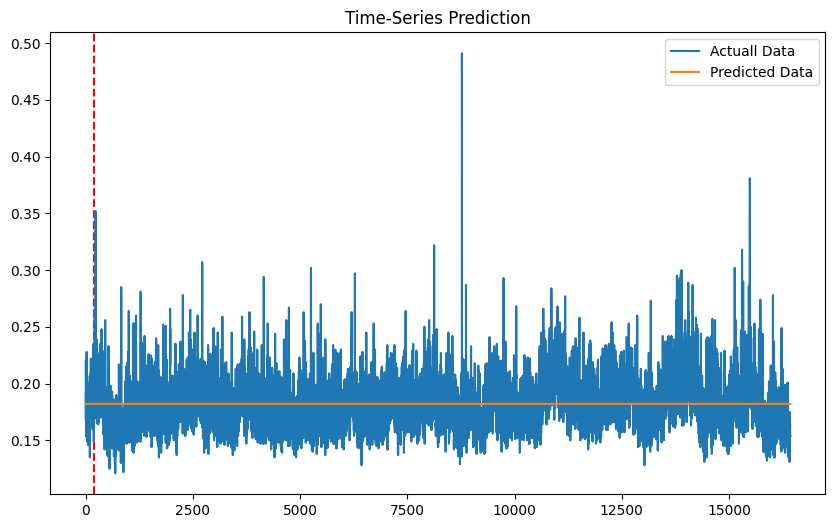

In [ ]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 